In [ ]:
# import data and show that column names and length are not the same

# show the prossess of cleanning the data

# show the renaming of columns heads for the merge

In [115]:
import pandas as pd

df_2019 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2019.csv')
df_2019['year'] = 2019

cols_lst = ['Overall rank', 'Country or region', 'Score', 'GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year']

df_2019.columns = cols_lst

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [116]:
df_2018 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2018.csv')
df_2018['year'] = 2018

df_2018.columns = cols_lst

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [117]:
df_2017 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2017.csv')
df_2017['year'] = 2017
df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

temp_lst = list(df_2017)


col_Titles=["Happiness.Rank","Country"] + temp_lst[2:]


df_2017=df_2017.reindex(columns=col_Titles)

df_2017.columns = cols_lst

df_2017.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [76]:
df_2016 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2016.csv')
df_2016['year'] = 2016
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Region'] ,axis = 1,inplace=True)

temp_lst = list(df_2016)

col_Titles = ["Happiness Rank","Country"] + temp_lst[2:]

df_2016 = df_2016.reindex(columns=col_Titles)
df_2016.columns = cols_lst
df_2016.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [118]:
df_2015 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2015.csv')
df_2015['year'] = 2015
lst = list(df_2015)
df_2015.drop([lst[1], lst[4], lst[-2]], axis = 1, inplace=True)

lst = list(df_2015)
col_Titles = ["Happiness Rank", "Country"] + lst[2:]

df_2015 = df_2015.reindex(columns=col_Titles)
df_2015.columns = cols_lst

df_2015.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [85]:
all_years_data = [df_2019, df_2018, df_2017, df_2016, df_2015]

df = pd.concat(all_years_data)

df.head(250)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
89,90,Jordan,5.161,0.822,1.265,0.645,0.468,0.130,0.134,2018
90,91,Nigeria,5.155,0.689,1.172,0.048,0.462,0.201,0.032,2018
91,92,Kyrgyzstan,5.131,0.530,1.416,0.594,0.540,0.281,0.035,2018
92,93,Bosnia and Herzegovina,5.129,0.915,1.078,0.758,0.280,0.216,0.000,2018


In [119]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.178526,0.165325,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.119115,0.127466,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.084860,0.067389,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.155219,0.128000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.246864,0.236908,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,2019.000000


In [120]:
df.isnull().sum()
#checking to see which values are null

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

In [121]:
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(0)
#fillling missing values

In [122]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

In [128]:
import matplotlib.pyplot as plt

df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
Overall rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.206222,-0.227545,-0.007768
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.223577,0.251747,0.007065
GDP per capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.121173,0.121891,0.019768
Social support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.192008,-0.109221,0.367431
Healthy life expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.092768,0.131049,0.130302
Freedom to make life choices,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.358228,0.326378,0.010353
Generosity,-0.206222,0.223577,0.121173,0.192008,0.092768,0.358228,1.000000,0.131391,0.150721
Perceptions of corruption,-0.227545,0.251747,0.121891,-0.109221,0.131049,0.326378,0.131391,1.000000,-0.427954
year,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,0.150721,-0.427954,1.000000


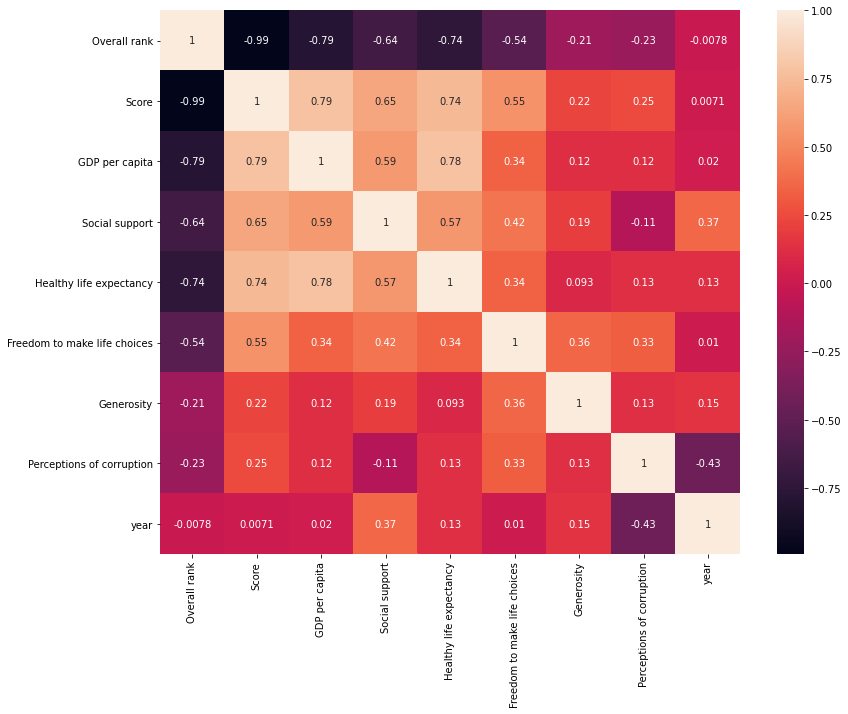

In [129]:
import seaborn as sns
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [ ]:
X = df[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = df['Score']


In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
reg = model.fit(X_train, y_train, X_test, y_test)